### **1. Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

### **2. Data Set**

> *This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years. There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.*

**`Make`:** Company of the vehicle

**`Model`:** Car model

**`Vehicle Class`:** Class of vehicle depending on their utility, capacity and weight

**`Engine Size`:** Size of engine used in Litre

**`Cylinders`:** Number of cylinders

**`Transmission`:** Transmission type with number of gears

**`Fuel type`:** Type of Fuel used

**`Fuel Consumption City`:** Fuel consumption in city roads (L/100 km)

**`Fuel Consumption Hwy`:** Fuel consumption in Hwy roads (L/100 km)

**`Fuel Consumption Comb`:** The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

**`Fuel Consumption Comb mpg`:** The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)

**`Model`**  

4WD/4X4 = Four-wheel drive

AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase

**`Transmission`** 

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

**`Fuel Type`**

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas

In [2]:
# retrieve the data
df_0 = pd.read_csv("CO2_Emissions_Canada.csv")
df = df_0.copy()

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [120]:
df_0["Fuel Consumption Comb (L/100 km)"].min()

np.float64(4.1)

### **3. Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.shape

(7385, 12)

In [6]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
if df.isnull().values.any() == False:
    print("There is no NaN value in the Data Set.")

There is no NaN value in the Data Set.


In [8]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [9]:
# a function to showcase missing values 
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(df)

,Total,Percent
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0
Fuel Consumption Comb (L/100 km),0,0.0


In [10]:
# Duplicated data
df_duplicated=df[df.duplicated() == True]
df_duplicated

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [11]:
# We have some duplicateed data. İf u want u can drop all duplicate data.

#indexs=df_duplicated.index
#for i in indexs:
#    df.drop(i, axis = 0,inplace = True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


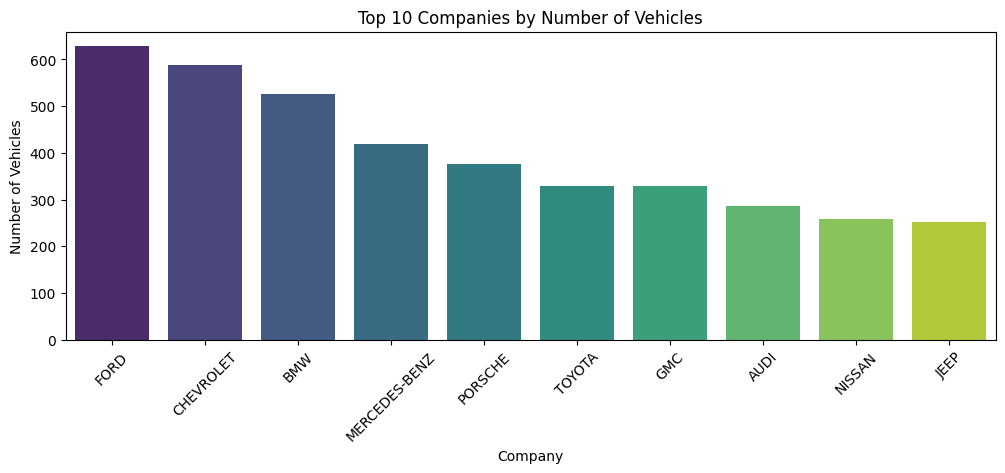

In [13]:
# Count the number of vehicles for each company
top_10_companies = df['Make'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 4))
sns.barplot(x=top_10_companies.index, y=top_10_companies.values, palette='viridis')
plt.title('Top 10 Companies by Number of Vehicles')
plt.xlabel('Company')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

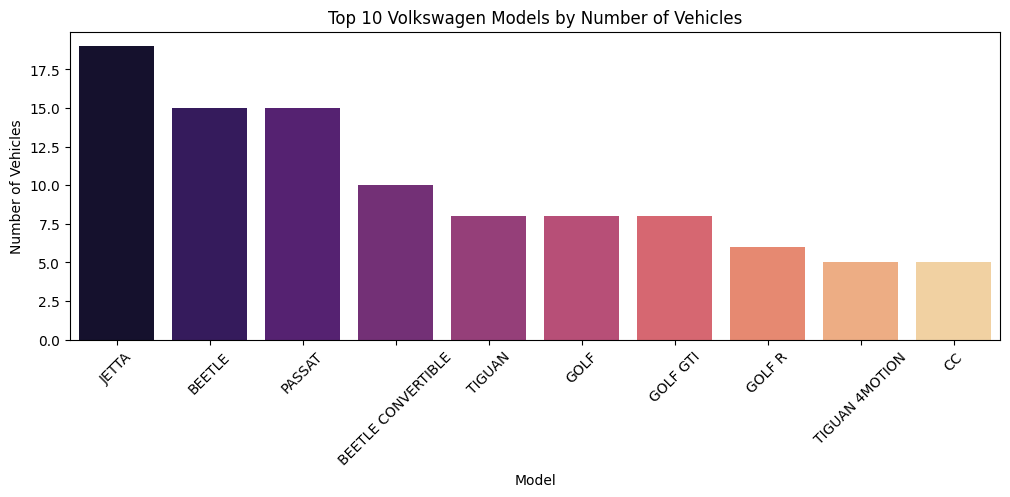

In [14]:
# Count the number of vehicles for volkswagen
top_10_volkswagen_model = df.loc[df["Make"] == "VOLKSWAGEN", "Model"].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 4))
sns.barplot(x=top_10_volkswagen_model.index, y=top_10_volkswagen_model.values, palette='magma')
plt.title('Top 10 Volkswagen Models by Number of Vehicles')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

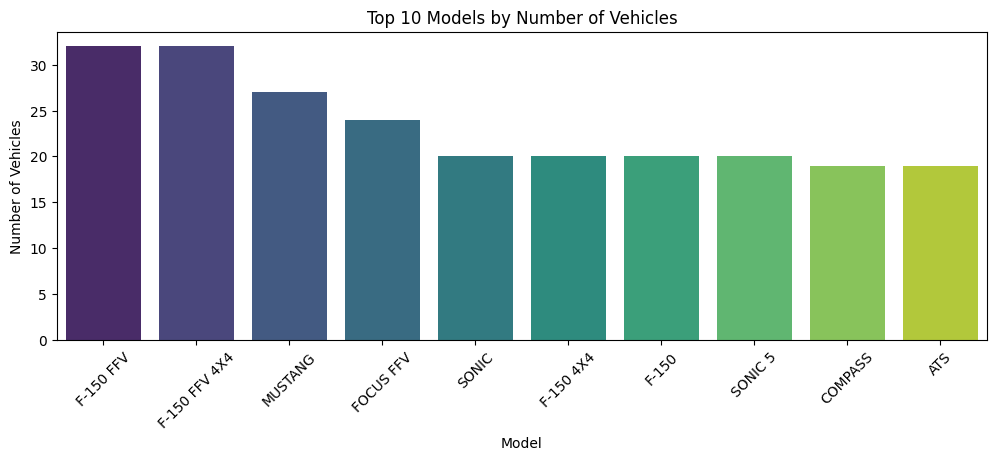

In [15]:
# Count the number of vehicles for each company
top_10_models = df['Model'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 4))
sns.barplot(x=top_10_models.index, y=top_10_models.values, palette='viridis')
plt.title('Top 10 Models by Number of Vehicles')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

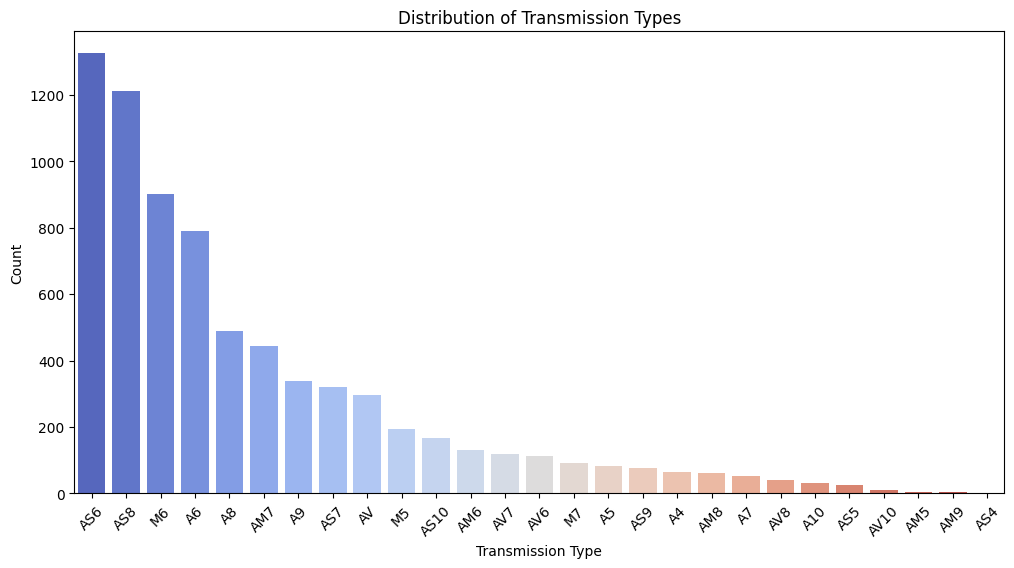

In [16]:
# Count the number of each transmission type
transmission_counts = df['Transmission'].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='coolwarm')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **4. Data Preprocessing**

In [19]:
df = df[["Engine Size(L)", "Cylinders", "Fuel Type", "Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]

In [21]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,8.5,196
1,2.4,4,Z,9.6,221
2,1.5,4,Z,5.9,136
3,3.5,6,Z,11.1,255
4,3.5,6,Z,10.6,244


In [22]:
df["Fuel Type"].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [23]:
df = df[df["Fuel Type"] != "N"]


In [25]:
df["Fuel Type"].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
Name: count, dtype: int64

In [32]:
# apply get dummy for fuel types
dums = pd.get_dummies(df['Fuel Type'], prefix="Fuel_Type", drop_first=True, dtype=int)
result = pd.concat([df, dums], axis=1)
result = result.drop(columns="Fuel Type")

In [33]:
result.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,196,0,0,1
1,2.4,4,9.6,221,0,0,1
2,1.5,4,5.9,136,0,0,1
3,3.5,6,11.1,255,0,0,1
4,3.5,6,10.6,244,0,0,1


In [34]:
X = result.drop(columns="CO2 Emissions(g/km)")
y = df["CO2 Emissions(g/km)"]

### **5. Normalize**

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

### **6. Linear Regression**

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

np.float64(5.4773075948382175)

In [44]:
model.score(X_train, y_train)

0.991207078401155

In [45]:
cross_val_score(model, X_train, y_train, cv = 10, scoring="r2").mean()

np.float64(0.9910760985285908)

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a new dataframe with actual, prediction, and diff columns
results_df = pd.DataFrame({
    'actual': y_test,
    'prediction': y_pred,
    'diff': y_test - y_pred
})

results_df.head()

,actual,prediction,diff
5632,368,361.106295,6.893705
1550,290,292.103566,-2.103566
1128,382,383.064388,-1.064388
6498,211,210.201588,0.798412
3270,193,192.171551,0.828449


In [47]:
X

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,0,0,1
1,2.4,4,9.6,0,0,1
2,1.5,4,5.9,0,0,1
3,3.5,6,11.1,0,0,1
4,3.5,6,10.6,0,0,1
...,...,...,...,...,...,...
7380,2.0,4,9.4,0,0,1
7381,2.0,4,9.9,0,0,1
7382,2.0,4,10.3,0,0,1
7383,2.0,4,9.9,0,0,1


In [113]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7384.0,3.160008,1.354252,0.9,2.0,3.0,3.7,8.4
Cylinders,7384.0,5.614978,1.828425,3.0,4.0,6.0,6.0,16.0
Fuel Consumption Comb (L/100 km),7384.0,10.974837,2.892633,4.1,8.9,10.6,12.6,26.1
Fuel_Type_E,7384.0,0.050108,0.218183,0.0,0.0,0.0,0.0,1.0
Fuel_Type_X,7384.0,0.492551,0.499978,0.0,0.0,0.0,1.0,1.0
Fuel_Type_Z,7384.0,0.433640,0.495610,0.0,0.0,0.0,1.0,1.0


In [59]:
engine_size = 4
cylinders = 7
fuel_con_com = 11
fuel_type =  "Diesel"

df_pred = pd.DataFrame({
    "Engine Size(L)": engine_size,
    "Cylinders": cylinders,
    "Fuel Consumption Comb (L/100 km)": fuel_con_com,
    "Fuel_Type_E": 0,
    "Fuel_Type_X": 0,
    "Fuel_Type_Z": 0
}, index=["Values"])

    if fuel_type.lower() == "regular gasoline":
        df_pred["Fuel_Type_X"] = 1
    elif fuel_type.lower() == "premium gasoline":
        df_pred["Fuel_Type_Z"] = 1
    elif fuel_type.lower() == "ethanol (e85)":
        df_pred["Fuel_Type_E"] = 1

In [102]:
df_pred

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
Values,4,7,11,0,0,0


In [73]:
scaler.fit_transform(df_pred)[0][0]

np.float64(0.0)

### **Create Pipeline**

In [74]:
from sklearn.pipeline import Pipeline
import joblib
import sklearn

In [89]:
df = df_0[["Engine Size(L)", "Cylinders", "Fuel Type", "Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]

In [90]:
df = df[df["Fuel Type"] != "N"]

In [92]:
dums = pd.get_dummies(df['Fuel Type'], prefix="Fuel_Type", drop_first=True, dtype=int)
result = pd.concat([df, dums], axis=1)
result = result.drop(columns="Fuel Type")

In [93]:
X = result.drop(columns="CO2 Emissions(g/km)")
y = df["CO2 Emissions(g/km)"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
])

In [96]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [97]:
with open('CO2_Emissions_Canada.pkl', 'wb') as f:
    joblib.dump(pipeline, f)

print("Pipeline has been saved to CO2_Emissions_Canada.pkl")

Pipeline has been saved to CO2_Emissions_Canada.pkl


In [98]:
with open('CO2_Emissions_Canada.pkl', 'rb') as f:
    loaded_pipeline = joblib.load(f)

print("Pipeline has been loaded from CO2_Emissions_Canada.pkl")

Pipeline has been loaded from CO2_Emissions_Canada.pkl


In [99]:
y_pred = loaded_pipeline.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the loaded pipeline: {mse:.2f}")

Mean Squared Error of the loaded pipeline: 29.46


In [ ]:
dums = pd.get_dummies(df['Fuel Type'], prefix="Fuel_Type", drop_first=True, dtype=int)
result = pd.concat([df, dums], axis=1)
result = result.drop(columns="Fuel Type")

In [103]:
new_y_pred = loaded_pipeline.predict(df_pred)

In [109]:
new_y_pred = int(new_y_pred)

In [110]:
new_y_pred

287